In [1]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [4]:
include("2d_wave_solver.jl");
include("point_source.jl");


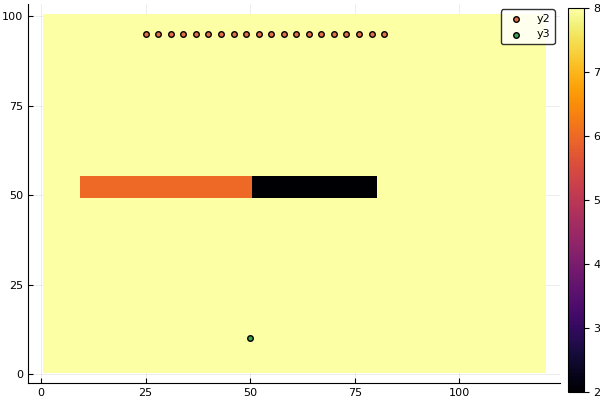

In [19]:
# Test
pml_len = 10;
pml_alpha = 100;

Nx = 100;
Ny = 120;
h = 0.05;

Nt = 400;
dt = 0.0025;

c = 8 * ones(Nx,Ny);
c[50:55,10:50] = 6;
c[50:55,51:80] = 2;
# c[40:end,45:end] = 4;
# c[30:33,:] = 5;

source_coor = [10 50];
receiver_coor = 95 * ones(Int,20,2);
receiver_coor[:,2] = 25:3:84;

source_func = zeros(1,Nt);
source_func[1,:] = source_ricker(Nt, dt, 5, 0.02);
plot(source_func[1,:])

# t = linspace(0,(Nt-1)*dt,Nt);
# plot(t,source_func[1,:])
#
heatmap(c)
scatter!(receiver_coor[:,2], receiver_coor[:,1])
scatter!(source_coor[:,2], source_coor[:,1])

In [5]:
uu, snaps_uu, rec_data = wave_solver_2d_pml(c,Nx,Ny,h,Nt,dt,pml_len,pml_alpha,source_coor,source_func,receiver_coor);


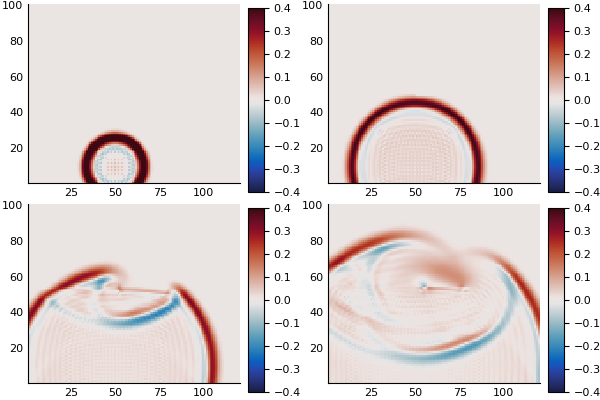

In [18]:
max_value = 0.4
p1 = heatmap(snaps_uu[:,:,50] , zlims=(-max_value,max_value), clims=(-max_value,max_value), fillcolor=:balance);
p2 = heatmap(snaps_uu[:,:,100] , zlims=(-max_value,max_value), clims=(-max_value,max_value), fillcolor=:balance);
p3 = heatmap(snaps_uu[:,:,150] , zlims=(-max_value,max_value), clims=(-max_value,max_value), fillcolor=:balance);
p4 = heatmap(snaps_uu[:,:,200] , zlims=(-max_value,max_value), clims=(-max_value,max_value), fillcolor=:balance);
plot(p1,p2,p3,p4)


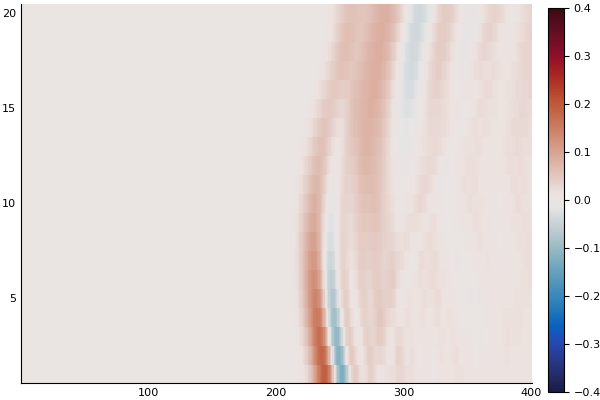

In [20]:
heatmap(rec_data, zlims=(-max_value,max_value), clims=(-max_value,max_value), fillcolor=:balance)